In [1]:
from baf2sql2unidec import *
import matplotlib.pyplot as plt
import os
import unidec
from unidec.metaunidec.mudeng import MetaUniDec
from unidec import tools as ud
import pandas as pd

In [2]:
def match(pks, masslist, names, tolerance):
    matches = []
    errors = []
    peaks = []
    nameslist = []

    for p in pks:

        target = p.mass
    #     print(target)
        nearpt = ud.nearestunsorted(masslist, target)

        match = masslist[nearpt]
        error = target-match
        if np.abs(error) < tolerance: 
            name = names[nearpt]
            p.error = error
        else:
            name = ""
        p.label = name
        p.match = match
        p.matcherror = error

        matches.append(match)
        errors.append(error)
        peaks.append(target)
        nameslist.append(name)
        
    matchlist = [peaks, matches, errors, nameslist]
    return matchlist 

### Updates:
- Now runs through pip installed unidec 
- Improved matching algorithm
- Added upload from .d files using baf2sql (much faster than mzML)


In [3]:
# path = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\testing\\20230710 4C_24h_1.d"
# directory = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\24h"
directory = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\testing"
directory = "E:\\charlie HRMS data\\PDRA Ocr23-Jan24 data\\20240116 AY PfAPP studies\\4 dC"
scans = [434, 481]
# scans = [444, 500]
scans = [434, 500]

masslist = [11814, 12488, 12417, 12254]
names = ["GGG-CTB", "AYLPETGGG-CTB", "YLPETGGG-CTB", "LPETGGG-CTB"]
tolerance = 10

In [4]:
# spectrum = BafSpectrum()
# name, data = spectrum.export_scans_from_file(path, scanstart = scans[0], scanend = scans[1])
# plt.plot(data[:, 0], data[:, 1])
# plt.plot(spectrum.rt, spectrum.tic)
# plt.axvspan(spectrum.rt[scans[0]], spectrum.rt[scans[1]])

Specified BAF has 738 spectra with line and profile data.


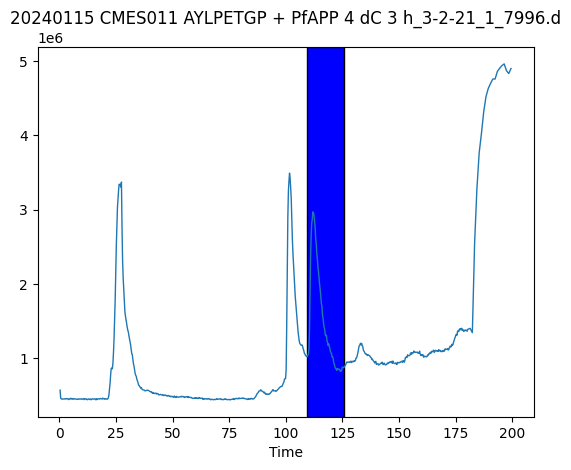

Specified BAF has 738 spectra with line and profile data.


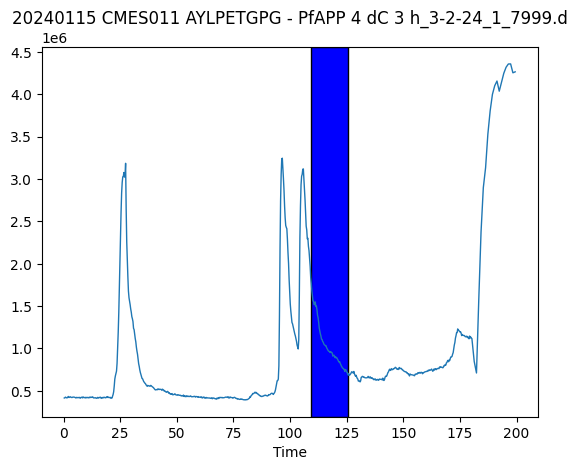

Specified BAF has 738 spectra with line and profile data.


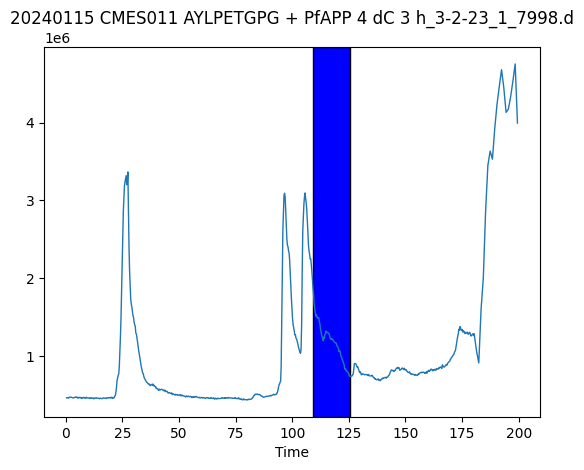

Specified BAF has 738 spectra with line and profile data.


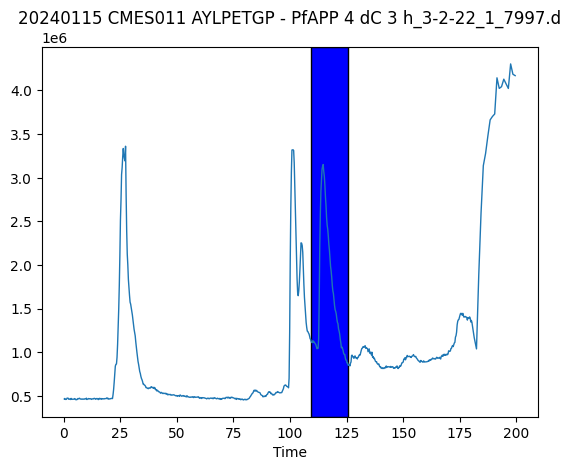

Specified BAF has 739 spectra with line and profile data.


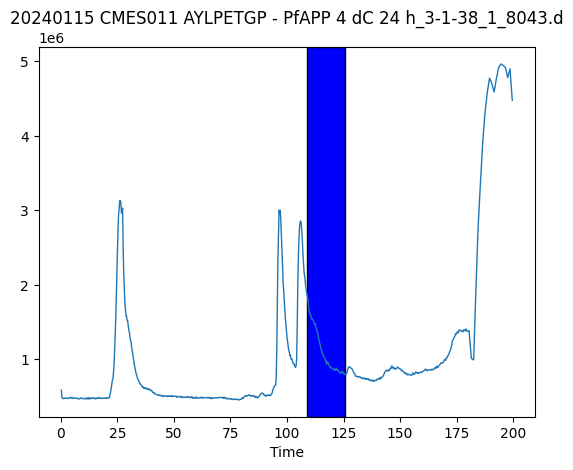

Specified BAF has 739 spectra with line and profile data.


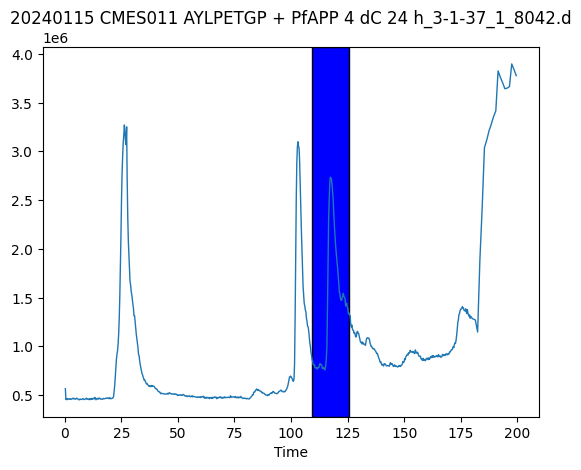

Specified BAF has 738 spectra with line and profile data.


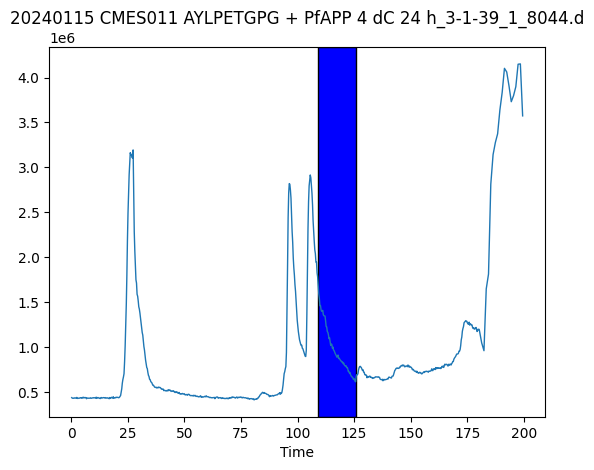

Specified BAF has 739 spectra with line and profile data.


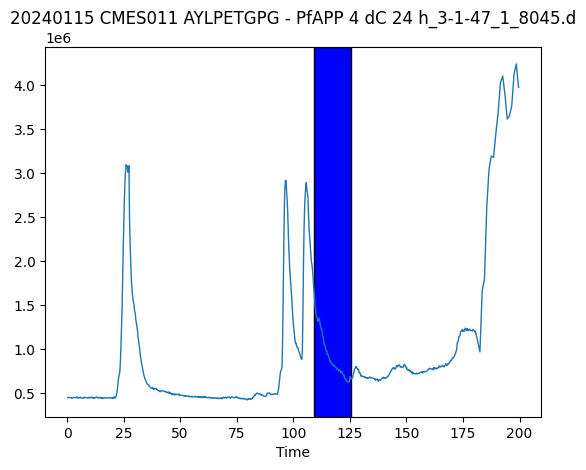

In [5]:
spectra_names = [x for x in os.listdir(directory) if x[-2:] == ".d"]

spectra = []
for s in spectra_names:
    try:
        path = os.path.join(directory, s)
        spectrum = BafSpectrum()
        spectrum.export_scans_from_file(path, scanstart = scans[0], scanend = scans[1])
#         spectrum.rf=spectrum.rf/60
        spectrum.plot_tic(show_scans=True)
        spectra.append(spectrum)
    except Exception as error:
        print(s + " failed", error)

In [6]:
hdf5_name = os.path.split(directory)[1]+".hdf5"

hdf5_path = os.path.join(directory, hdf5_name)
eng= MetaUniDec()
eng.data.new_file(hdf5_path)


UniDec Engine v.6.0.4

UniDec Path: C:\Users\cm19ljc\Anaconda3\envs\unidec3\lib\site-packages\unidec\bin\unidec.exe


In [7]:
spectra

Adding: 20240115 CMES011 AYLPETGP + PfAPP 4 dC 3 h_3-2-21_1_7996.d to ms_dataset


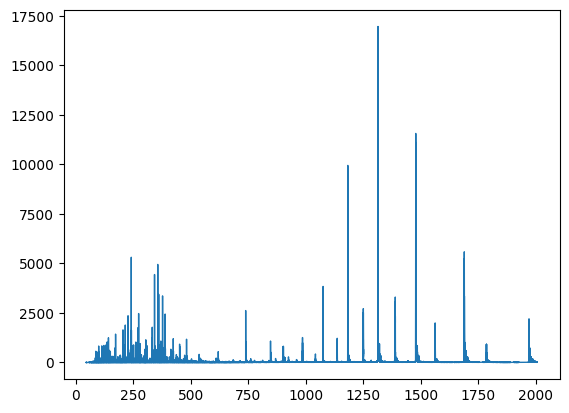

Adding: 20240115 CMES011 AYLPETGPG - PfAPP 4 dC 3 h_3-2-24_1_7999.d to ms_dataset


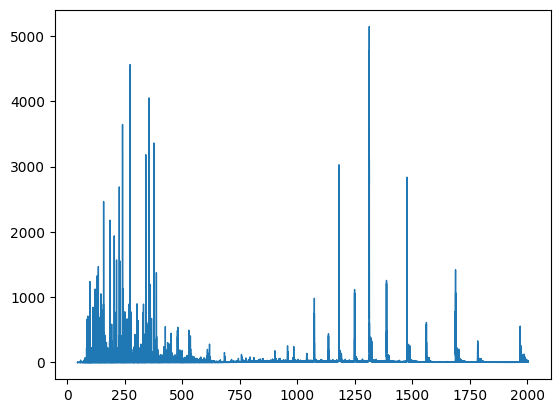

Adding: 20240115 CMES011 AYLPETGPG + PfAPP 4 dC 3 h_3-2-23_1_7998.d to ms_dataset


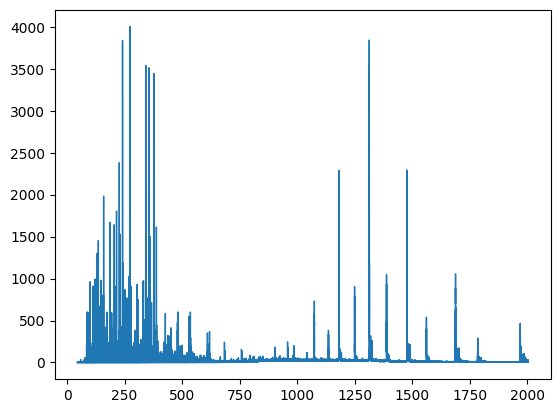

Adding: 20240115 CMES011 AYLPETGP - PfAPP 4 dC 3 h_3-2-22_1_7997.d to ms_dataset


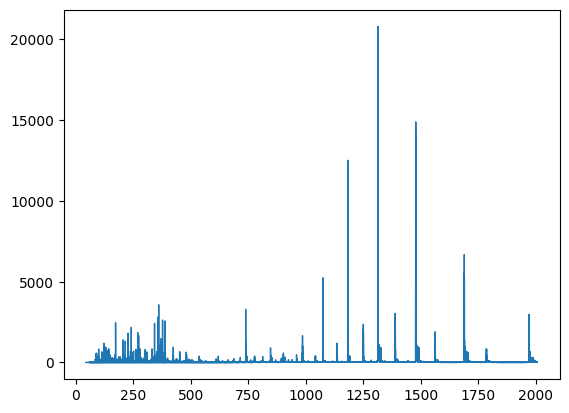

Adding: 20240115 CMES011 AYLPETGP - PfAPP 4 dC 24 h_3-1-38_1_8043.d to ms_dataset


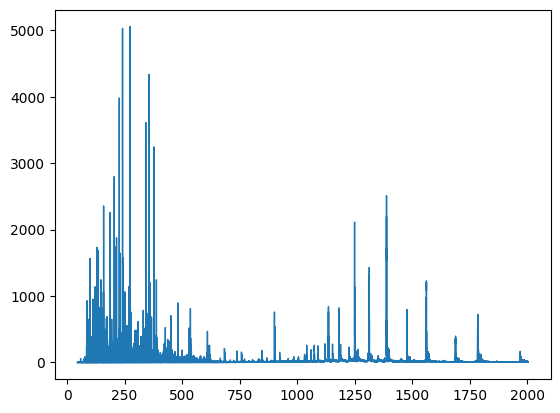

Adding: 20240115 CMES011 AYLPETGP + PfAPP 4 dC 24 h_3-1-37_1_8042.d to ms_dataset


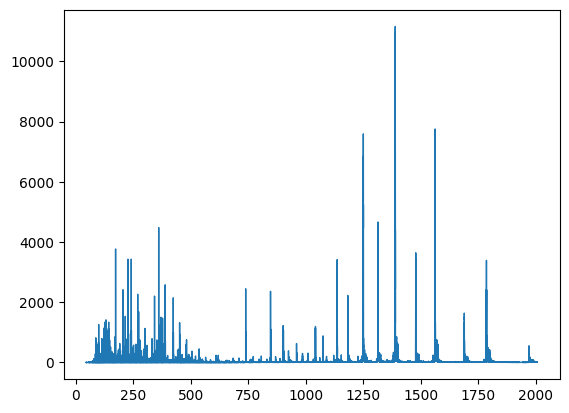

Adding: 20240115 CMES011 AYLPETGPG + PfAPP 4 dC 24 h_3-1-39_1_8044.d to ms_dataset


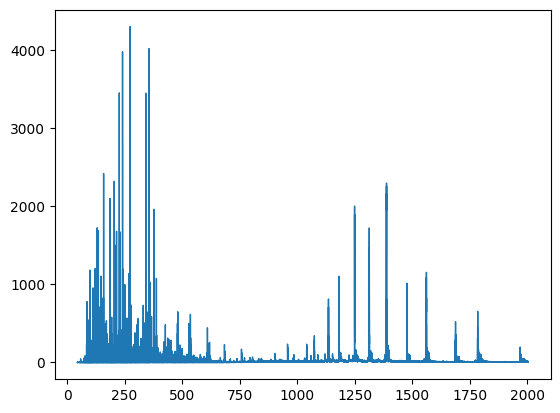

Adding: 20240115 CMES011 AYLPETGPG - PfAPP 4 dC 24 h_3-1-47_1_8045.d to ms_dataset


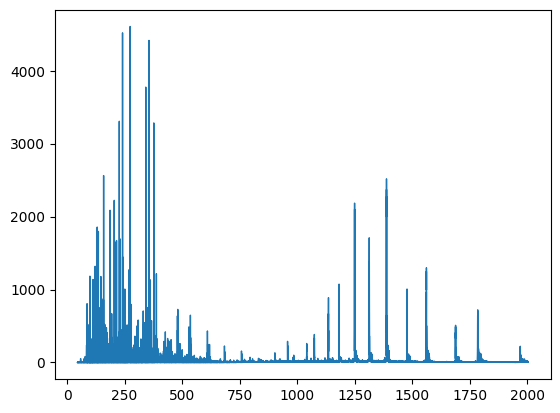

In [8]:
plot=True
for s in spectra:
    
    eng.data.add_data(s.data2, name=s.name, export=False)
    if plot:
        plt.plot(s.data2[:, 0], s.data2[:,1])
        plt.show()
eng.data.export_hdf5()

In [9]:
len(spectra)

8

In [10]:
# Parameters
# UniDec
eng.config.minmz=700
eng.config.numit = 100
eng.config.zzsig = 1
eng.config.psig = 1
eng.config.beta = 1
eng.config.startz = 1
eng.config.endz = 100
eng.config.numz = 100
eng.config.mzsig = 0.85
eng.config.automzsig = 0
eng.config.psfun = 0
eng.config.psfunz = 0
eng.config.autopsfun = 0
eng.config.massub = 17000
eng.config.masslb = 10000
eng.config.msig = 0
eng.config.molig = 0
eng.config.massbins = 1
eng.config.adductmass = 1.007276467
eng.config.baselineflag = 1
eng.config.aggressiveflag = 0
eng.config.noiseflag = 0
eng.config.isotopemode = 0
eng.config.orbimode = 0

# Other
eng.config.mtabsig = 0
eng.config.poolflag = 2
eng.config.nativezub = 1000
eng.config.nativezlb = -1000
eng.config.inflate = 1
eng.config.linflag = 2
eng.config.integratelb = ""
eng.config.integrateub = ""
eng.config.filterwidth = 20
eng.config.zerolog = -12

eng.config.datanorm = 1
eng.config.subuff=100
eng.config.subtype=2

# peak picking
eng.config.peakwindow = 10
eng.config.peaknorm = 0
eng.config.peakplotthresh = 0.1 
eng.config.peakthresh = 0.01


eng.config.datanorm = 0
eng.config.exnorm = 0
eng.config.write_hdf5()

In [11]:
# eng.config.__dict__

In [12]:
eng.open(hdf5_path)
eng.process_data()

eng.run_unidec()


Mass Grid Warning: (0,) (0,)
mz grid Warning: (0,) (0,)
Opening Time: 0.6981080999999989
Execution Time: 0.6028680000000008
Mass Grid Warning: (0,) (0,)
mz grid Warning: (0,) (0,)
Execution Time: 398.7429804
Mass Grid Warning: (0,) (0,)
mz grid Warning: (0,) (0,)


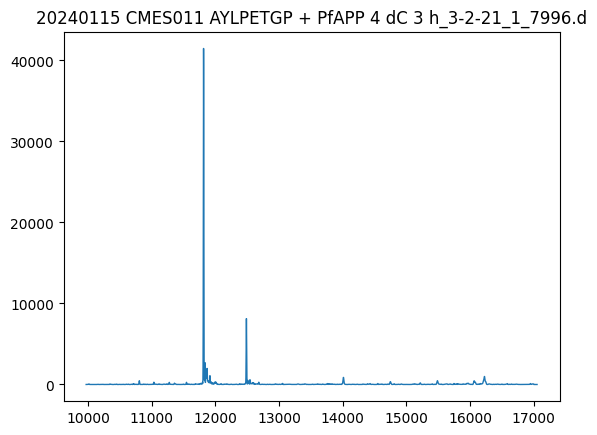

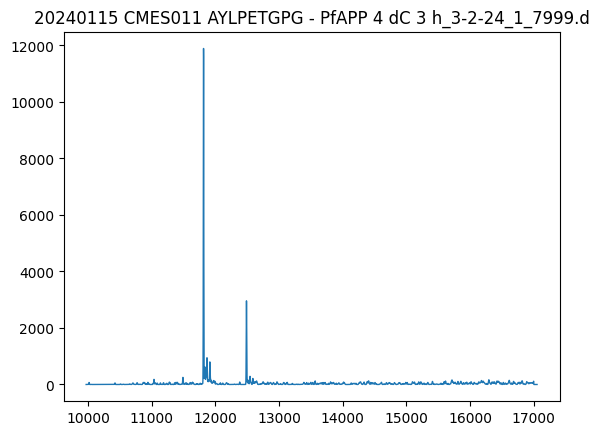

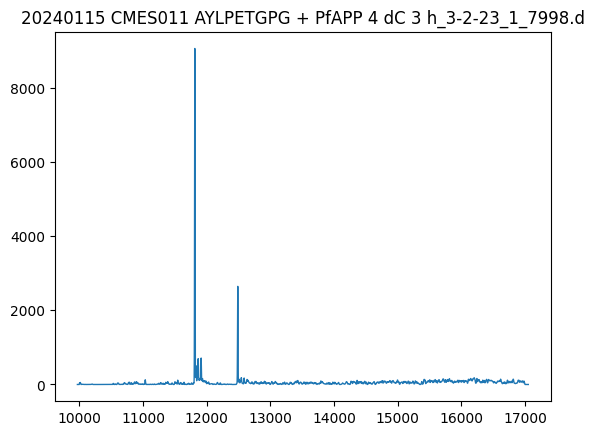

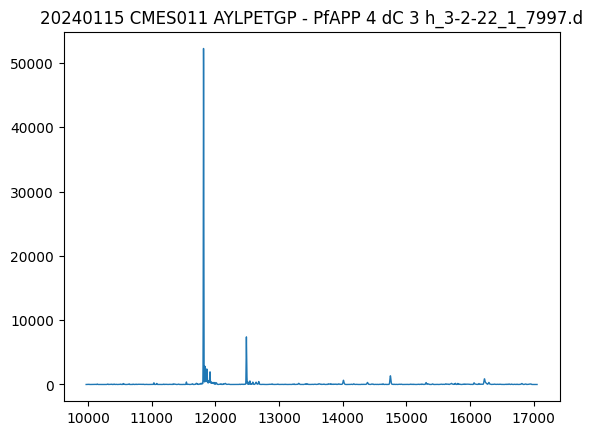

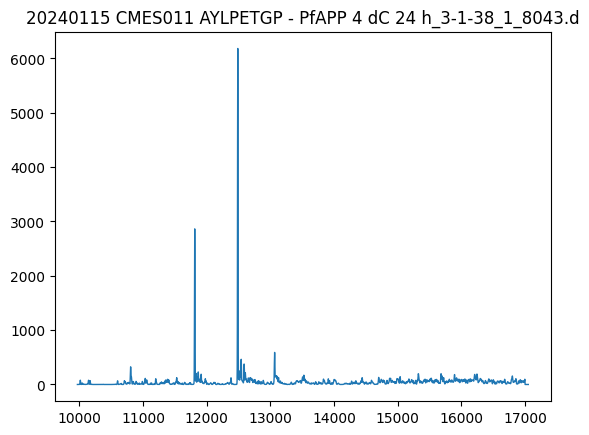

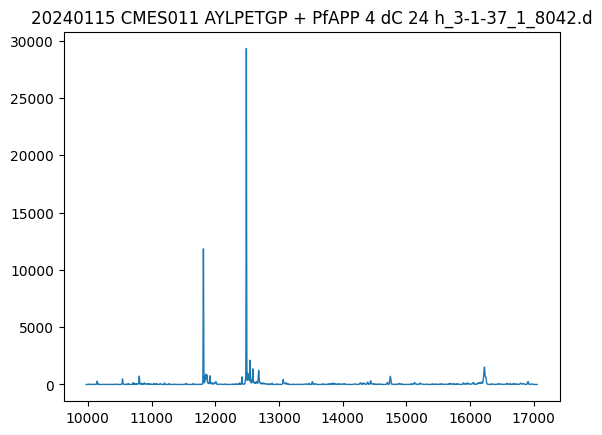

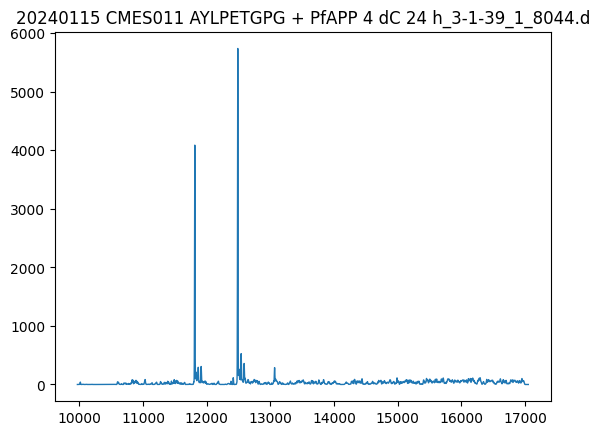

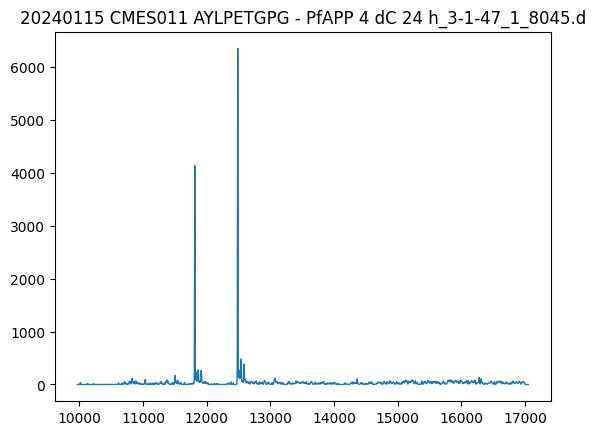

In [13]:
for s in eng.data.spectra:
    
    plt.plot(s.massdat[:,0],s.massdat[:,1],)
    plt.title(s.name)
    # plt.xlim([13000, 14000])
    plt.show()

In [14]:
eng.config.peakthresh = 0.05

eng.pick_peaks()

Execution Time: 0.6822508999999854
Peak info saved to: E:\charlie HRMS data\PDRA Ocr23-Jan24 data\20240116 AY PfAPP studies\4 dC\UniDec_Figures_and_Files\4 dC_extracts.txt


In [15]:
# eng.config.beta

In [16]:
for s in eng.data.spectra:
    print(s.name)
    
    for p in s.pks.peaks:
        print(p.mass, p.height, p.label, p.matcherror)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    

20240115 CMES011 AYLPETGP + PfAPP 4 dC 3 h_3-2-21_1_7996.d
10806.0 460.54828 A 0
11815.0 41465.61 B 0
11836.0 2698.0479 C 0
11851.0 1151.9885 D 0
11870.0 1980.3903 E 0
11894.0 418.60034 F 0
11915.0 1081.8479 G 0
12488.0 8129.57 H 0
12510.0 501.33643 I 0
12543.0 590.69055 J 0
14012.0 869.48944 K 0
15487.0 465.68475 L 0
16064.0 454.96365 M 0
16226.0 988.0775 N 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
20240115 CMES011 AYLPETGPG - PfAPP 4 dC 3 h_3-2-24_1_7999.d
11035.0 180.9113 A 0
11490.0 250.21512 B 0
11814.0 11892.22 C 0
11836.0 620.79095 D 0
11868.0 944.5264 E 0
11890.0 168.61588 F 0
11913.0 798.6462 G 0
11974.0 139.3595 H 0
12488.0 2959.135 I 0
12509.0 161.78693 J 0
12543.0 288.2635 K 0
12588.0 213.57541 L 0
12647.0 122.6591 M 0
13567.0 124.055176 N 0
14406.0 128.59207 O 0
15615.0 120.955795 P 0
15716.0 160.3726 Q 0
16179.0 140.74663 R 0
16295.0 166.2106 S 0
16424.0 122.77519 T 0
16615.0 146.2885 U 0
16817.0 131.53543 V 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
20240115 CMES011 AYLPETGPG + PfA

20240115 CMES011 AYLPETGP + PfAPP 4 dC 3 h_3-2-21_1_7996.d


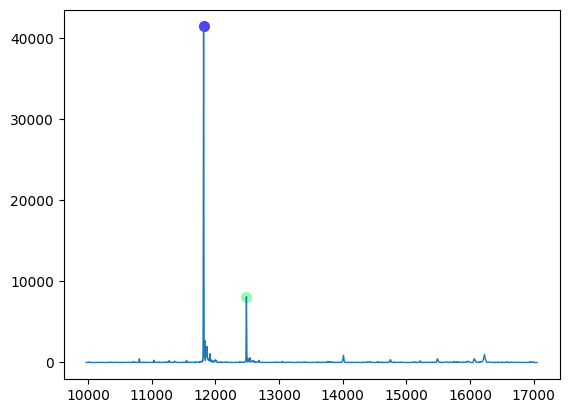

20240115 CMES011 AYLPETGPG - PfAPP 4 dC 3 h_3-2-24_1_7999.d


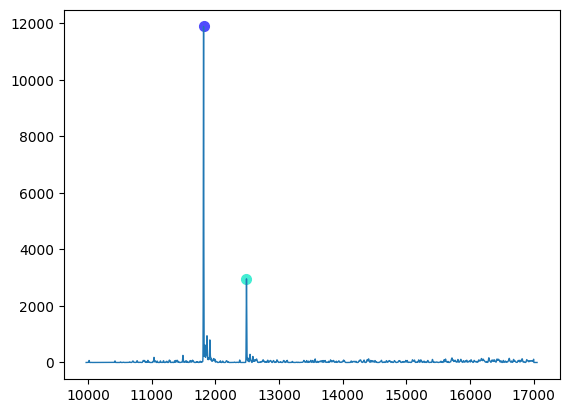

20240115 CMES011 AYLPETGPG + PfAPP 4 dC 3 h_3-2-23_1_7998.d


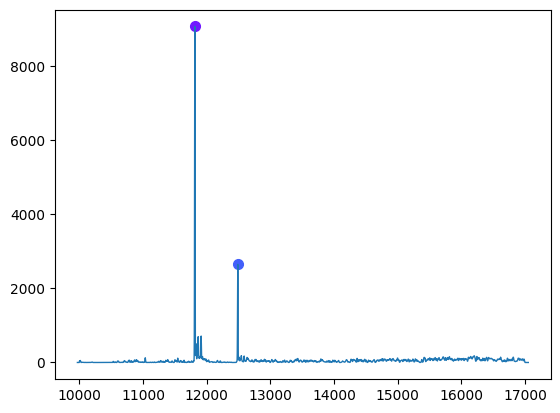

20240115 CMES011 AYLPETGP - PfAPP 4 dC 3 h_3-2-22_1_7997.d


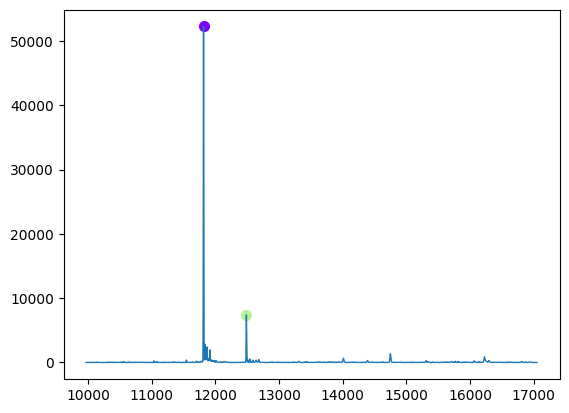

20240115 CMES011 AYLPETGP - PfAPP 4 dC 24 h_3-1-38_1_8043.d


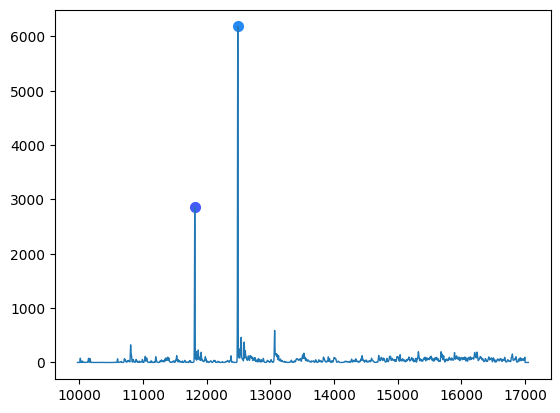

20240115 CMES011 AYLPETGP + PfAPP 4 dC 24 h_3-1-37_1_8042.d


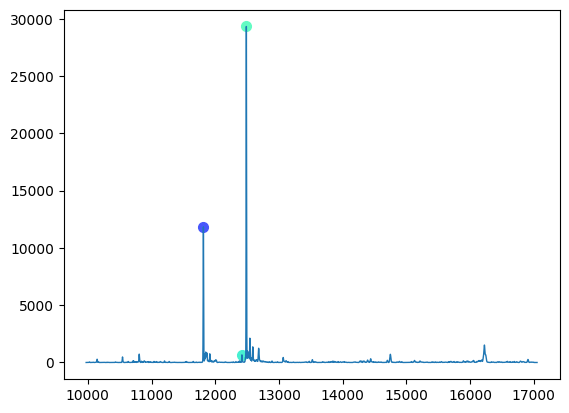

20240115 CMES011 AYLPETGPG + PfAPP 4 dC 24 h_3-1-39_1_8044.d


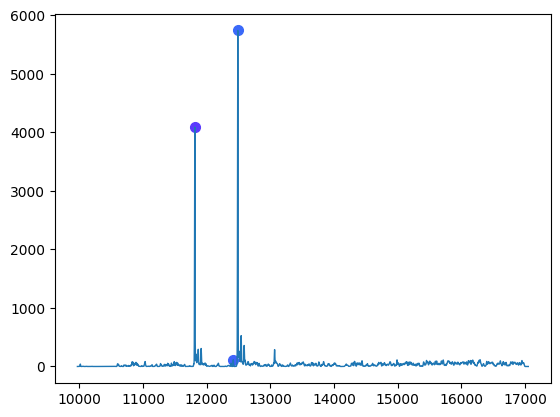

20240115 CMES011 AYLPETGPG - PfAPP 4 dC 24 h_3-1-47_1_8045.d


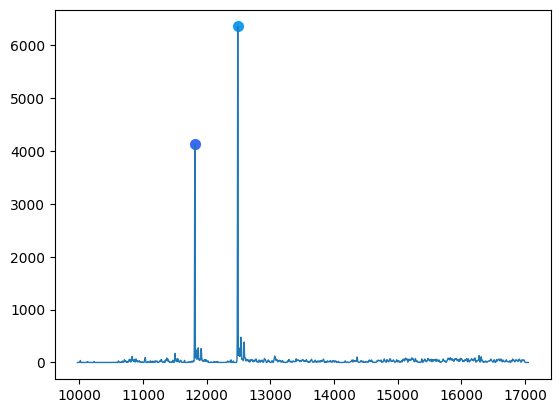

In [17]:
for s in eng.data.spectra:
    print(s.name)
    
    # match peaks to oligos
    match(s.pks.peaks, masslist, names, tolerance)
    
    
    
    plt.plot(s.massdat[:,0],s.massdat[:,1],)
    for p in s.pks.peaks:
#         plt.scatter(p.mass, p.height)
        if p.label != "":
            plt.scatter(p.mass, p.height, color = p.color)
    plt.show()
    
# dct = {"Label":label, "Mass":mass, "Height":height, "Name":s_name}    

In [18]:
dfs = []
for s in eng.data.spectra:
    counter = 0
    label = []
    mass = []
    height = []
    for p in s.pks.peaks:

        if p.label !="":

            label.append(p.label)
            mass.append(p.mass)
            height.append(p.height)
            counter = counter+1
    s_name = [s.name]*counter

    dct = {"Label":label, "Mass":mass, "Height":height, "Name":s_name}
    df = pd.DataFrame(dct)
    df['Percentage_Labelling'] = (df.Height/df.Height.sum())*100
    dfs.append(df)
results_df = pd.concat(dfs)

In [19]:
results_df

,Label,Mass,Height,Name,Percentage_Labelling
0,GGG-CTB,11815.0,41465.609375,20240115 CMES011 AYLPETGP + PfAPP 4 dC 3 h_3-2...,83.608147
1,AYLPETGGG-CTB,12488.0,8129.569824,20240115 CMES011 AYLPETGP + PfAPP 4 dC 3 h_3-2...,16.391855
0,GGG-CTB,11814.0,11892.219727,20240115 CMES011 AYLPETGPG - PfAPP 4 dC 3 h_3-...,80.074982
1,AYLPETGGG-CTB,12488.0,2959.135010,20240115 CMES011 AYLPETGPG - PfAPP 4 dC 3 h_3-...,19.925018
0,GGG-CTB,11814.0,9061.727539,20240115 CMES011 AYLPETGPG + PfAPP 4 dC 3 h_3-...,77.400551
1,AYLPETGGG-CTB,12489.0,2645.847656,20240115 CMES011 AYLPETGPG + PfAPP 4 dC 3 h_3-...,22.599449
0,GGG-CTB,11815.0,52258.164062,20240115 CMES011 AYLPETGP - PfAPP 4 dC 3 h_3-2...,87.598953
1,AYLPETGGG-CTB,12488.0,7397.984863,20240115 CMES011 AYLPETGP - PfAPP 4 dC 3 h_3-2...,12.401044
0,GGG-CTB,11813.0,2863.301758,20240115 CMES011 AYLPETGP - PfAPP 4 dC 24 h_3-...,31.649199
1,AYLPETGGG-CTB,12489.0,6183.694824,20240115 CMES011 AYLPETGP - PfAPP 4 dC 24 h_3-...,68.350807


In [20]:
# df3 = pd.DataFrame(results_df.Name)


In [21]:
# results_df

In [22]:
results2 = pd.pivot(results_df, index='Name', columns='Label', values = 'Percentage_Labelling').fillna(0)

results2.reset_index(inplace=True)
results2

Label,Name,AYLPETGGG-CTB,GGG-CTB,YLPETGGG-CTB
0,20240115 CMES011 AYLPETGP + PfAPP 4 dC 24 h_3-...,70.114555,28.294176,1.591267
1,20240115 CMES011 AYLPETGP + PfAPP 4 dC 3 h_3-2...,16.391855,83.608147,0.000000
2,20240115 CMES011 AYLPETGP - PfAPP 4 dC 24 h_3-...,68.350807,31.649199,0.000000
3,20240115 CMES011 AYLPETGP - PfAPP 4 dC 3 h_3-2...,12.401044,87.598953,0.000000
4,20240115 CMES011 AYLPETGPG + PfAPP 4 dC 24 h_3...,57.726349,41.117607,1.156053
5,20240115 CMES011 AYLPETGPG + PfAPP 4 dC 3 h_3-...,22.599449,77.400551,0.000000
6,20240115 CMES011 AYLPETGPG - PfAPP 4 dC 24 h_3...,60.562580,39.437412,0.000000
7,20240115 CMES011 AYLPETGPG - PfAPP 4 dC 3 h_3-...,19.925018,80.074982,0.000000


In [23]:
# split Name for conditions 
# results2[["date", "ID", "peptide", "PfAPP_cond", "pf", "temp", "degrees", "time", "hrs"]] = results2.Name.str.split(" ", expand=True)


In [24]:
# conditions_input_df = pd.read_excel(os.path.join(directory, "Conditions_input.xlsx"))

In [25]:
# results2.Name = results2['Name'].str.rstrip('.d')

In [26]:
# results2 = conditions_input_df.merge(results2, how='left', on="Name")

In [27]:
# results2

In [28]:
results_name = os.path.split(directory)[1]+"_results.xlsx"
results_path = os.path.join(directory,results_name)
results2.to_excel(results_path)